In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from fake_useragent import UserAgent
from matplotlib import pyplot as plt
import time
import os, json
import ddddocr
import base64
import io
import matplotlib.image as mpimg
import undetected_chromedriver as uc
from webdriver_manager.chrome import ChromeDriverManager

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:00<00:00, 38.8MB/s]


欢迎使用ddddocr，本项目专注带动行业内卷，个人博客:wenanzhe.com
训练数据支持来源于:http://146.56.204.113:19199/preview
爬虫框架feapder可快速一键接入，快速开启爬虫之旅：https://github.com/Boris-code/feapder
谷歌reCaptcha验证码 / hCaptcha验证码 / funCaptcha验证码商业级识别接口：https://yescaptcha.com/i/NSwk7i
WRg3


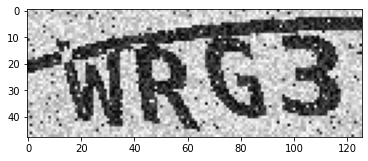

In [2]:
my_options = uc.ChromeOptions() 
my_options.add_argument("--start-maximized")
my_options.add_argument("--incognito")
my_options.add_argument("--disable-popup-blocking")
driver = uc.Chrome(executable_path=ChromeDriverManager().install(), options=my_options)

def agreeCookie():        
    driver.get("https://irs.thsrc.com.tw/IMINT/?locale=tw")
    iagree = WebDriverWait(driver,5).until(
        EC.element_to_be_clickable((By.XPATH,'//*[@id="cookieAccpetBtn"]'))
    )
    iagree.click()

def page1():    
    seat_select = WebDriverWait(driver,5).until(
         EC.element_to_be_clickable((By.XPATH,'/html/body/div[6]/main/section/div/div/form/div[2]/div[1]/div/label[3]/select/option[2]'))
    )
    seat_select.click()

    start_station = WebDriverWait(driver,5).until(
         EC.element_to_be_clickable((By.XPATH,'//*[@id="BookingS1Form"]/div[3]/div[1]/div/div[1]/div/select/option[3]'))
    )
    start_station.click()

    des_station = WebDriverWait(driver,5).until(
         EC.element_to_be_clickable((By.XPATH,'//*[@id="BookingS1Form"]/div[3]/div[1]/div/div[2]/div/select/option[10]'))
    )
    des_station.click()

    WebDriverWait(driver,5).until(
         EC.element_to_be_clickable((By.XPATH,'//*[@id="BookingS1Form"]/div[3]/div[2]/div/div[1]/div[1]/input[2]'))
    ).click()

    start_day = WebDriverWait(driver,5).until(
         EC.element_to_be_clickable((By.XPATH,'/html/body/div[9]/div[2]/div/div[2]/div[2]/span[29]'))
    ) 

    start_day.click()

    start_time = WebDriverWait(driver,5).until(
         EC.element_to_be_clickable((By.XPATH,
        '//*[@id="BookingS1Form"]/div[3]/div[2]/div/div[2]/div[1]/select/option[32]'))
    )
    start_time.click()


def captcha_img():
    img_base64 = driver.execute_script("""
        var ele = arguments[0];
        var cnv = document.createElement('canvas');
        cnv.width = ele.width; cnv.height = ele.height;
        cnv.getContext('2d').drawImage(ele, 0, 0);
        return cnv.toDataURL('image/jpeg').substring(22);    
        """, driver.find_element('xpath' ,'//*[@id="BookingS1Form_homeCaptcha_passCode"]'))

    i = base64.b64decode(img_base64.split(',')[1])
    i = io.BytesIO(i)
    i = mpimg.imread(i, format='PNG')
    plt.imshow(i)

    ocr = ddddocr.DdddOcr()
    res = ocr.classification(img_base64)  # 識別
    print(res)
    answer1 = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, '//*[@id="securityCode"]'))
    )
    answer1.send_keys(res.upper())

def page1_submit():
    submitbutton = WebDriverWait(driver,10).until(
        EC.element_to_be_clickable((By.XPATH,'/html/body/div[6]/main/section/div/div/form/input'))
    )
    submitbutton.click()
    

def page2_confirm():    
    confirm = WebDriverWait(driver,2).until(
        EC.element_to_be_clickable((By.XPATH,'//*[@id="BookingS2Form"]/section[2]/div/div/input'))
    )

def captcha_error():
    print('驗證碼錯誤')

    img_base64_2 = driver.execute_script("""
    var ele = arguments[0];
    var cnv = document.createElement('canvas');
    cnv.width = ele.width; cnv.height = ele.height;
    cnv.getContext('2d').drawImage(ele, 0, 0);
    return cnv.toDataURL('image/jpeg').substring(22);    
    """, driver.find_element('xpath' ,'//*[@id="BookingS1Form_homeCaptcha_passCode"]'))
    
    ocr = ddddocr.DdddOcr()
    res2 = ocr.classification(img_base64_2)  # 識別
    print(res2)
    
    answer2 = WebDriverWait(driver, 5).until(
        EC.element_to_be_clickable((By.XPATH, '//*[@id="securityCode"]'))
    )
    answer2.send_keys(res2.upper())
    
    WebDriverWait(driver, 5).until(
        EC.element_to_be_clickable((By.XPATH,
        '/html/body/div[6]/main/section/div/div/form/div[4]/div[1]/div[1]/div/select/option[2]'))
    ).click()
    
    submitbutton2 = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH,'/html/body/div[6]/main/section/div/div/form/input'))
    )
    submitbutton2.click()


def page2_to_page3():
    confirm = WebDriverWait(driver,10).until(
         EC.element_to_be_clickable((By.XPATH,'//*[@id="BookingS2Form"]/section[2]/div/div/input'))
    )
    confirm.click()

    take_id = WebDriverWait(driver,10).until(
         EC.element_to_be_clickable((By.XPATH,'//*[@id="idNumber"]'))
    )

    take_id.send_keys('')

    member_select = WebDriverWait(driver,10).until(
         EC.element_to_be_clickable((By.XPATH,'//*[@id="memberSystemRadio1"]'))
    )

    member_select.click()

    member_checkbox = WebDriverWait(driver,10).until(
         EC.element_to_be_clickable((By.XPATH,'//*[@id="memberShipCheckBox"]'))
    )

    member_checkbox.click()

    checkbox = WebDriverWait(driver,10).until(
         EC.element_to_be_clickable((By.XPATH,'//*[@id="BookingS3FormSP"]/section[2]/div[3]/div[1]/label/input'))
    )

    checkbox.click()

    finish_book = WebDriverWait(driver,10).until(
         EC.element_to_be_clickable((By.XPATH,'//*[@id="isSubmit"]'))
    )

    finish_book.click()

    time.sleep(3)
    final_confirm = WebDriverWait(driver,10).until(
         EC.element_to_be_clickable((By.XPATH,'//*[@id="btn-custom2"]'))
    )
    # final_confirm.click()

if __name__ == "__main__":
    agreeCookie()
    page1()
    captcha_img()
    page1_submit()
    try:
        page2_confirm()
    except:
        captcha_error()
    finally:
        page2_to_page3()


欢迎使用ddddocr，本项目专注带动行业内卷，个人博客:wenanzhe.com
训练数据支持来源于:http://146.56.204.113:19199/preview
爬虫框架feapder可快速一键接入，快速开启爬虫之旅：https://github.com/Boris-code/feapder
谷歌reCaptcha验证码 / hCaptcha验证码 / funCaptcha验证码商业级识别接口：https://yescaptcha.com/i/NSwk7i
yrnY
驗證碼錯誤
欢迎使用ddddocr，本项目专注带动行业内卷，个人博客:wenanzhe.com
训练数据支持来源于:http://146.56.204.113:19199/preview
爬虫框架feapder可快速一键接入，快速开启爬虫之旅：https://github.com/Boris-code/feapder
谷歌reCaptcha验证码 / hCaptcha验证码 / funCaptcha验证码商业级识别接口：https://yescaptcha.com/i/NSwk7i
32Z3


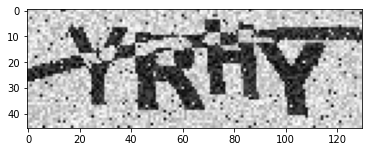

In [49]:
if __name__ == "__main__":
    agreeCookie()
    page1()
    captcha_img()
    page1_submit()
    try:
        page2_confirm()
    except:
        captcha_error()
    finally:
        page2_to_page3()